In [1]:
import os
import csv
import json

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

def save_fig(filename):
    new_filename = 'plots/' + filename.replace(' ', '-').lower()
    plt.savefig(new_filename, bbox_inches = 'tight')

In [3]:
DATASETS = ['DMOZ', 'ILP', 'Phishing']

In [4]:
data = {}

for dataset in DATASETS:
    with open(f'results/{dataset.lower()}.json', 'r') as f:
        data[dataset] = json.load(f)
        
data

{'DMOZ': {'NB': {'F1': 0.47014416139700704, 'Val Acc': 0.5188},
  'LR': {'F1': 0.4761802655757706, 'Val Acc': 0.503225},
  'SVM': {'F1': 0.5131819049474287, 'Val Acc': 0.54285}},
 'ILP': {'NB': {'F1': 0.48199705726025466, 'Val Acc': 0.6670716889428918},
  'LR': {'F1': 0.5781321808415699, 'Val Acc': 0.6907654921020656},
  'SVM': {'F1': 0.5874028949464528, 'Val Acc': 0.7339003645200486}},
 'Phishing': {'NB': {'F1': 0.9821190745484847, 'Val Acc': 0.9877605028117764},
  'LR': {'F1': 0.9902692436998835, 'Val Acc': 0.9933840555739332},
  'SVM': {'F1': 0.994986223836815, 'Val Acc': 0.9965817620465321}}}

In [5]:
data_adjusted = {
    'Dataset': [],
    'Model': [],
    'Metric': [],
    'Score': []
}

for dataset in data.keys():
    for model in data[dataset].keys():
        for metric, val in data[dataset][model].items():
            data_adjusted['Dataset'].append(dataset)
            data_adjusted['Model'].append(model)
            data_adjusted['Metric'].append(metric)
            data_adjusted['Score'].append(val)

In [6]:
df = pd.DataFrame.from_dict(data_adjusted)
df

,Dataset,Model,Metric,Score
0,DMOZ,NB,F1,0.470144
1,DMOZ,NB,Val Acc,0.518800
2,DMOZ,LR,F1,0.476180
3,DMOZ,LR,Val Acc,0.503225
4,DMOZ,SVM,F1,0.513182
5,DMOZ,SVM,Val Acc,0.542850
6,ILP,NB,F1,0.481997
7,ILP,NB,Val Acc,0.667072
8,ILP,LR,F1,0.578132
9,ILP,LR,Val Acc,0.690765


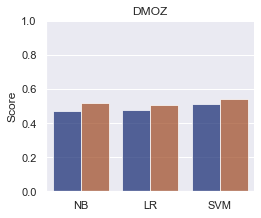

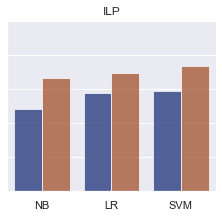

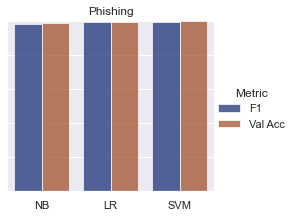

In [7]:
height = 3
aspect = 1.2


for i, dataset in enumerate(DATASETS):
    rows = df[df['Dataset'] == dataset]
    cat_args = {'data': rows, 'kind': 'bar',
                'x': 'Model', 'y': 'Score', 'hue': 'Metric',
                'palette': 'dark', 'alpha': .7,
                'height': height, 'aspect': aspect}

    is_last = i + 1 == len(DATASETS)
    if not is_last:
        cat_args['legend'] = None
    
    sns.catplot(**cat_args)
    
    is_first = i == 0
    if not is_first:  # Remove y label and ticks
        plt.ylabel('')
        ax = plt.gca()
        ax.axes.yaxis.set_ticklabels([])
    
    plt.xlabel('')
    plt.ylim((0, 1))
    plt.title(dataset)
    save_fig(f'{dataset.lower()}.pdf')
    plt.show()